In [ ]:
"""
1D Magneto-optical trap (MOT) simulation. Est. March 2019
Preston Huft

"""

# notes and todo
no 

In [1]:
## LIBRARIES 
import matplotlib.pyplot as plt
from math import e,pi
import numpy as np
from numpy import linspace,arange,empty,sin,cos,exp
from random import random as rand
from random import randint

from scipy.integrate import solve_ivp

## LOCAL FILES
from physconsts import *
from rbconsts import *
# from rbensemble import RbEnsemble as ensemble
import rbensemble
from rbensemble import RbEnsemble as ensemble

In [7]:
## VARS
dt = 0.05

In [43]:
## METHODS

def cc(z): 
    """Complex conjugate of z"""
    return np.conj(z)

def derivs(y0,t,t1,t2,D,O):
# def derivs(t,y0,params):
    """ Returns RHS of optical bloch eqs for current values at time t"""
    rgg,ree,reg = y0
#     O,D,t1,t2 = params # Rabi freq,detuning,lifetime,coherence
    
    # time derivatives of density op elements
    curl = 1j/2*(O*cc(reg)-cc(O)*reg) 
    drgg = ree/t1 - curl 
    dree = -ree/t1 + curl
    dreg = (1j*D-1/(2*t1))*reg+1j*O/2*(rgg-ree) # = cc(drge)
    
    return np.array([drgg,dree,dreg])

def master_solve(rho0,t_exp,D,O,t1=None,t2=None,pts=None):
    """ Just a wrapper for derivs and solve_ivp to simplify calling.
        Could use a decorator to implement derivs in future. 
        Turn into class later.
        'rho0': flattened density matrix [rgg,ree,reg_tilda]
        't_exp': experiment duration
        'D': detuning
        'O': Rabi frequency
    """
    
    if t1 is None:
        t1 = np.inf
    if t2 is None:
        t2 = np.inf
    if pts is None:
        pts = 50
    
    func = lambda y,t: derivs(t,y,t1,t2,D,O)
    soln = solve_ivp(func,[0,t_exp],rho0,t_eval=np.linspace(0,t_exp,pts))

    return soln

def binary_rand(dist):
    """ returns a zero (one) based on whether a random number picked on
        the domain of a specified discrete distribution is below (above)
        the dist value at a randomly picked index.
        'size': number of samples to generate
        'dist': [xpts,ypts] sampling distribution over desired domain
    """
    result = 0
    
    xpts = dist[0]
    fpts = dist[1]
    fmax = max(fpts)
    
    i = randint(0,len(xpts)-1)
    y = fmax*rand()
    if y > fpts[i]:
        result = 1
        
    print(f"x={xpts[i]},y={y}")
        
    return result

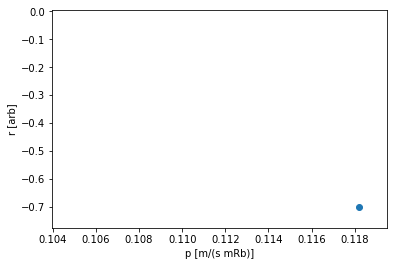

In [2]:
# RbEnsemble test
atoms = ensemble(5e-5,2,xdist='normal',statedist=[0,1])
atoms.amplitudes

atoms.phasespace()

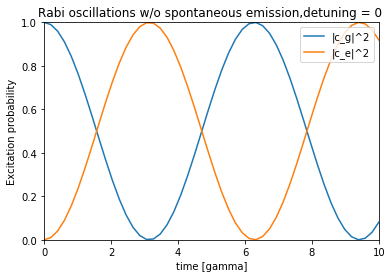

In [53]:
# atom solver test - slightly less low level
# initial conditions - system starts in ground state
rho_ee = 0 + 0j
rho_gg = 1 + 0j
rho_eg = 0 + 0j # no initial mixing; this is actually rho^tilda_ge
y0 = [rho_gg,rho_ee,rho_eg] # bundle i.c.

# equation parameters
D = 0 # the detuning
Omega = 1 # treat as real. d*E*exp(-1j*theta) # complex rabi frequency

t_exp = 10 # experiment duration in lifetimes

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim((0,1))
ax.set_xlim((0,t_exp))
ax.set_title('Rabi oscillations w/o spontaneous emission,detuning = %s '%D)
ax.set_xlabel('time [gamma]')
ax.set_ylabel('Excitation probability')

soln = master_solve(y0,t_exp,D,Omega)
ax.plot(soln.t,soln.y[0],label="|c_g|^2")
ax.plot(soln.t,soln.y[1],label="|c_e|^2")

ax.legend(loc='upper right')
plt.show()

In [54]:
# binary rand test
binary_rand([soln.t,soln.y[0]])

x=6.530612244897959,y=(0.114866608848746+0j)


0

In [61]:
## initial test build of the 1D MOT simulator
steps = 10
tpi = 
num = 3
atoms = ensemble(5e-5,num,xdist='normal',statedist=[0,1])
# atoms.phasespace()

v_avg = empty(steps,object)
# x_avg = empty(steps,object)
tlist = linspace(0,dt,100)

for i in range(num):
    
    vlist = empty(steps)
#     xlist = empty(steps)
    
    for i in range(steps):
        
        cg,ce = atoms.coeffs[i] # rho for the ith atom
        
